In [1]:
#======================== IMPORT PACKAGES ===========================

import numpy as np
import matplotlib.pyplot as plt 
from tkinter.filedialog import askopenfilename
import cv2
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from skimage.feature import greycomatrix, greycoprops

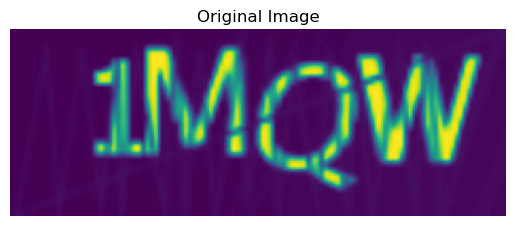

In [2]:
#====================== 1.READ A INPUT IMAGE =========================

filename = askopenfilename()
img = mpimg.imread(filename)
plt.imshow(img)
plt.title('Original Image')
plt.axis ('off')
plt.show()


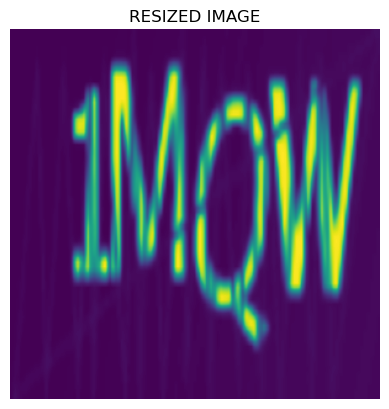

In [3]:
#============================ 2.IMAGE PREPROCESSING ====================

#==== RESIZE IMAGE ====

resized_image = cv2.resize(img,(300,300))
img_resize_orig = cv2.resize(img,((50, 50)))

fig = plt.figure()
plt.title('RESIZED IMAGE')
plt.imshow(resized_image)
plt.axis ('off')
plt.show()

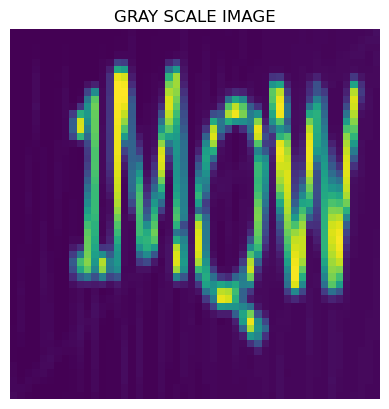

In [4]:
#==== GRAYSCALE IMAGE ====

try:            
    gray11 = cv2.cvtColor(img_resize_orig, cv2.COLOR_BGR2GRAY)
    
except:
    gray11 = img_resize_orig
   
fig = plt.figure()
plt.title('GRAY SCALE IMAGE')
plt.imshow(gray11)
plt.axis ('off')
plt.show()

In [5]:
#============================ 3.FEATURE EXTRACTION ====================

# === MEAN MEDIAN VARIANCE ===

mean_val = np.mean(gray11)
median_val = np.median(gray11)
var_val = np.var(gray11)
Test_features = [mean_val,median_val,var_val]


print()
print("----------------------------------------------")
print("FEATURE EXTRACTION --> MEAN, VARIANCE, MEDIAN ")
print("----------------------------------------------")
print()
print("1. Mean Value     =", mean_val)
print()
print("2. Median Value   =", median_val)
print()
print("3. Variance Value =", var_val)



----------------------------------------------
FEATURE EXTRACTION --> MEAN, VARIANCE, MEDIAN 
----------------------------------------------

1. Mean Value     = 0.49399814

2. Median Value   = 0.40933335

3. Variance Value = 0.026984481


In [6]:
#============================ 5. IMAGE SPLITTING ===========================

import os 

from sklearn.model_selection import train_test_split

test_data = os.listdir('Dataset/Test/')
tr_data = os.listdir('Dataset/Train/')


dot1= []
labels1 = [] 
for img11 in test_data:
        # print(img)
        img_1 = mpimg.imread('Dataset/Test//' + "/" + img11)
        img_1 = cv2.resize(img_1,((50, 50)))


        try:            
            gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
            
        except:
            gray = img_1

        
        dot1.append(np.array(gray))
        labels1.append(1)


for img11 in tr_data:
        # print(img)
        img_1 = mpimg.imread('Dataset/Train//' + "/" + img11)
        img_1 = cv2.resize(img_1,((50, 50)))


        try:            
            gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
            
        except:
            gray = img_1

        
        dot1.append(np.array(gray))
        labels1.append(2)

x_train, x_test, y_train, y_test = train_test_split(dot1,labels1,test_size = 0.2, random_state = 101)

print()
print("-------------------------------------")
print("       IMAGE SPLITTING               ")
print("-------------------------------------")
print()


print("Total no of data        :",len(dot1))
print("Total no of test data   :",len(x_train))
print("Total no of train data  :",len(x_test))



-------------------------------------
       IMAGE SPLITTING               
-------------------------------------

Total no of data        : 1001
Total no of test data   : 800
Total no of train data  : 201


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

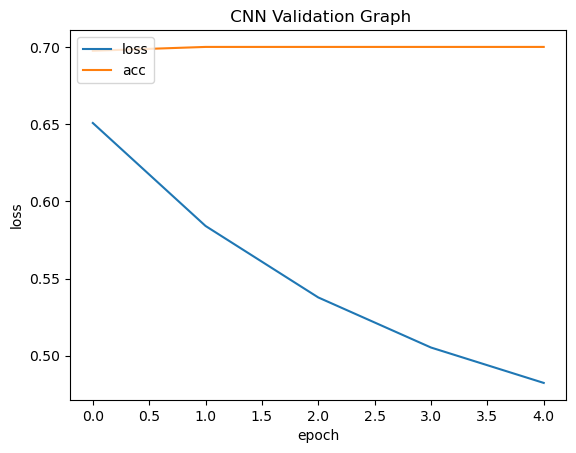

-------------------------------------------
     CNN- Perofrmance Analysis  
-------------------------------------------

1. Accuracy     = 69.9999988079071 %

2. Error rate   = 0.6507416367530823 %



In [7]:
#=============================== CLASSIFICATION =================================

from keras.utils import to_categorical


y_train1=np.array(y_train)
y_test1=np.array(y_test)

train_Y_one_hot = to_categorical(y_train1)
test_Y_one_hot = to_categorical(y_test)




x_train2=np.zeros((len(x_train),50,50,3))
for i in range(0,len(x_train)):
        x_train2[i,:,:,:]=x_train2[i]

x_test2=np.zeros((len(x_test),50,50,3))
for i in range(0,len(x_test)):
        x_test2[i,:,:,:]=x_test2[i]


# ======== CNN ===========
    
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
# from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dropout




# initialize the model
model=Sequential()


#CNN layes 
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(500,activation="relu"))

model.add(Dropout(0.2))

model.add(Dense(3,activation="softmax"))

#summary the model 
model.summary()

#compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
y_train1=np.array(y_train)

train_Y_one_hot = to_categorical(y_train1)
test_Y_one_hot = to_categorical(y_test)


print("-------------------------------------")
print("CONVOLUTIONAL NEURAL NETWORK (CNN)")
print("-------------------------------------")
print()
#fit the model 
history=model.fit(x_train2,train_Y_one_hot,batch_size=2,epochs=5,verbose=1)

loss= history.history['loss']
loss=max(loss)

acc_cnn=history.history['accuracy']
acc_cnn=max(acc_cnn)*100


plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.title(' CNN Validation Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc = 'upper left')
plt.show()


print("-------------------------------------------")
print("     CNN- Perofrmance Analysis  ")
print("-------------------------------------------")
print()

print("1. Accuracy     =", acc_cnn ,'%')
print()
print("2. Error rate   =", loss ,'%')
print()

Epoch 1/5
400/400 [==============================] - 6s 16ms/step - loss: 0.4658 - accuracy: 0.7000
Epoch 2/5
400/400 [==============================] - 6s 15ms/step - loss: 0.4536 - accuracy: 0.7000
Epoch 3/5
400/400 [==============================] - 6s 16ms/step - loss: 0.4444 - accuracy: 0.7000
Epoch 4/5
400/400 [==============================] - 6s 16ms/step - loss: 0.4373 - accuracy: 0.7000
Epoch 5/5
400/400 [==============================] - 6s 15ms/step - loss: 0.4318 - accuracy: 0.7000


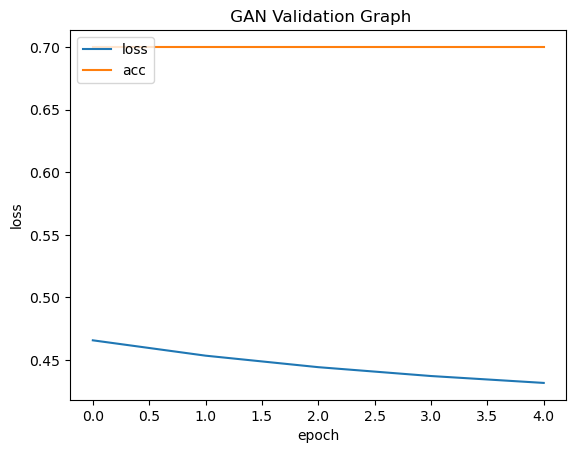

-------------------------------------------
                     GAN                 
-------------------------------------------

1. Accuracy  = 69.9999988079071 %

2. Error Rate = 0.4658159911632538 %



In [8]:
# c======= GAN ===========

import tensorflow as tf
from tensorflow.keras import layers

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    assert model.output_shape == (None,16 ) # Note: None is the batch size
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(8))
    assert model.output_shape == (None,8 )
    
    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False,
                                    input_shape=[1,100]))
   
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

   
    model.add(layers.Dense(1))
   # model.add(layers.Softmax())

    return model

generator=make_generator_model()
discriminator=make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

EPOCHS = 1
noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 64

def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,(1,100))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
     
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss,disc_loss)

import time
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

#x_train=x_train.values


history=model.fit(x_train2,train_Y_one_hot,batch_size=2,epochs=5,verbose=1)

loss= history.history['loss']
loss=max(loss)

acc_gan=history.history['accuracy']
acc_gan=max(acc_gan)

acc_gan=acc_gan*100

    
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.title(' GAN Validation Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc = 'upper left')
plt.show()


print("-------------------------------------------")
print("                     GAN                 ")
print("-------------------------------------------")
print()

print("1. Accuracy  =", acc_gan,'%')
print()
print("2. Error Rate =", loss,'%')
print()

Epoch 1/5
400/400 [==============================] - 7s 16ms/step - loss: 0.4274 - accuracy: 0.7000
Epoch 2/5
400/400 [==============================] - 7s 16ms/step - loss: 0.4239 - accuracy: 0.7000
Epoch 3/5
400/400 [==============================] - 7s 17ms/step - loss: 0.4211 - accuracy: 0.7000
Epoch 4/5
400/400 [==============================] - 7s 17ms/step - loss: 0.4188 - accuracy: 0.7000
Epoch 5/5
400/400 [==============================] - 6s 15ms/step - loss: 0.4169 - accuracy: 0.7000


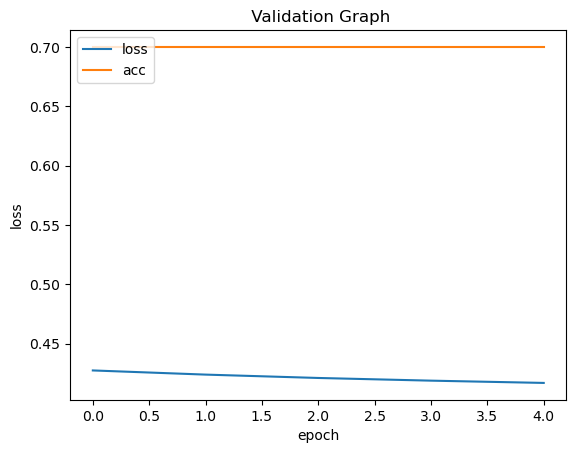

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense
classifier = Sequential() 
classifier.add(Dense(activation = "relu", input_dim = 1, units = 8, kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "relu", units = 14,kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "sigmoid", units = 1,kernel_initializer = "uniform")) 
classifier.compile(optimizer = 'adam' , loss = 'mae' )
history1=model.fit(x_train2,train_Y_one_hot,batch_size=2,epochs=5,verbose=1)

loss= history1.history['loss']
loss=max(loss)

acc_dd=history1.history['accuracy']
acc_dd=max(acc_dd)
acc_dd=acc_dd*100

plt.plot(history1.history['loss'])
plt.plot(history1.history['accuracy'])

plt.title(' Validation Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc = 'upper left')
plt.show()

In [10]:

print("----------------------------------------------")
print("NESTED DEEP NEURAL NETWORK")
print("----------------------------------------------")
print()


print("1) Accuracy     =",acc_dd ,'%')
print()
print('2) Error rate  = ',loss,'%')


----------------------------------------------
NESTED DEEP NEURAL NETWORK
----------------------------------------------

1) Accuracy     = 69.9999988079071 %

2) Error rate  =  0.42744675278663635 %


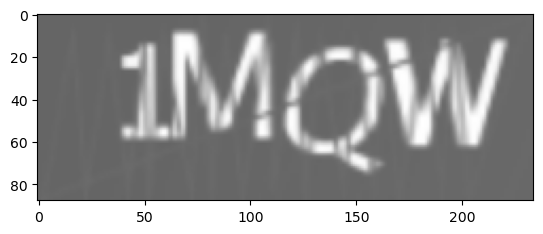

['IMQW', '', '']


In [11]:
import cv2
import pytesseract

tessdata_dir_config = '--tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata"'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

# text recognition
import matplotlib.pyplot as plt

# read image

img = cv2.imread(filename)
plt.imshow(img)
plt.show()
# configurations
config = ('-l eng --oem 1 --psm 3')
# pytesseract path
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'
text = pytesseract.image_to_string(img, config=config)
# print results
text = text.split('\n')
print(text)
